# Creating peripheral image combinations
To train on same/different combinations we need a lot of same/different images across image classes. To do this we're taking imagenet images and putting them in opposing corners of a canvas.

Here we create a canvas using `Pillow`

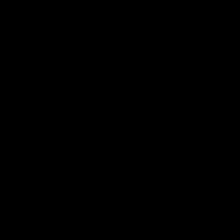

In [3]:
from PIL import Image

base = Image.new('RGB', (224, 224))
base.show()

And we can see that our images are of potentially different aspect ratios.

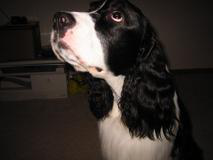

In [31]:
im1 = Image.open("/imagenet/imagenette160/imagenette2-160/train/n02102040/n02102040_209.JPEG")
im1.show()


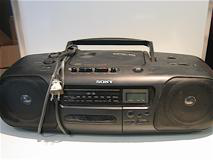

In [35]:
im2 = Image.open("/imagenet/imagenette160/imagenette2-160/train/n02979186/n02979186_2083.JPEG")
im2.show()

So we thumbnail each image and put them in either corner of the canvas

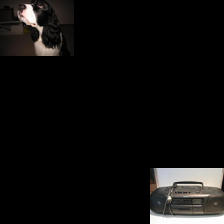

In [36]:
im1.thumbnail((224 // 3, 224//3))
base.paste(im1, (0,0))
im2.thumbnail((224//3, 224//3))
base.paste(im2, (224 - im2.size[0], 224 - im2.size[1]))
base.show()


In [9]:
from pathlib import Path
from itertools import permutations, islice
import string
import random 
imagenet_path = Path("/imagenet/imagenette160/imagenette2-160/")
path_list = permutations(imagenet_path.glob("train/**/*.JPEG"), 2)

def build_combo_image(paths):
    images = [Image.open(path) for path in paths]
    base = Image.new("RGB", (224, 224))
    thumb_size = (224//3, 224//3)
    
    [im.thumbnail(thumb_size) for im in images]
        
    
    base.paste(images[0], (0,0))
    base.paste(images[1], (224 - images[1].size[0], 224 - images[1].size[1]))

    return base


def create_combo_image(paths, dest, counter):
    dest = Path(dest)
    os.makedirs(dest, exist_ok=True)
    filename = paths[0].parts[-2] + "_" + paths[1].parts[-2] + "_" + str(counter) + ".JPG"
    img = build_combo_image(paths)
    img.save(dest / filename)
    return dest / filename


combos = [create_combo_image(paths,"/imagenet/combonet/train", count) for count, paths in enumerate(path_list)]

Showing 15 images of 56:


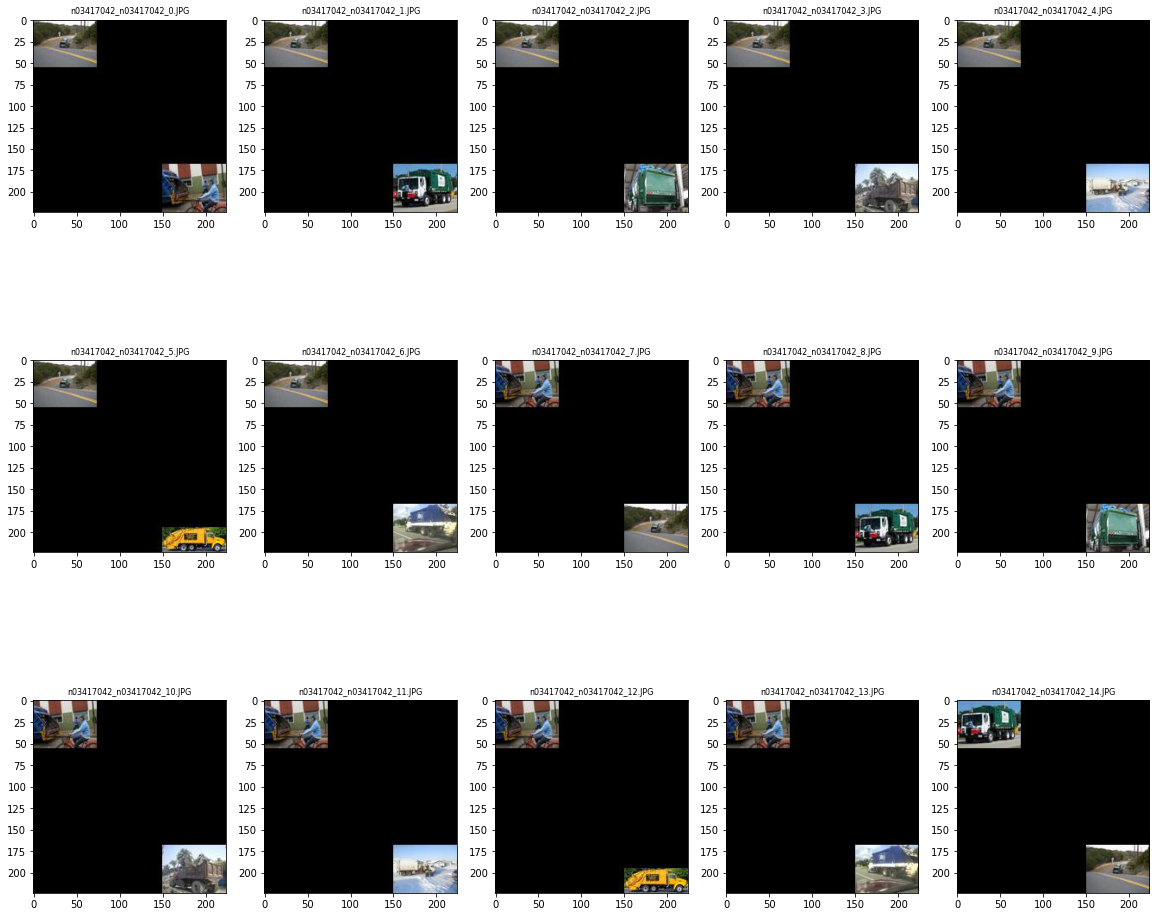

In [8]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import textwrap, os

def display_images(
    images: [PilImage], 
    columns=5, width=20, height=8, max_images=15, 
    label_wrap_length=50, label_font_size=8):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):

        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image)

        if hasattr(image, 'filename'):
            title=image.filename
            if title.endswith("/"): title = title[0:-1]
            title=os.path.basename(title)
            title=textwrap.wrap(title, label_wrap_length)
            title="\n".join(title)
            plt.title(title, fontsize=label_font_size);

display_images([Image.open(i) for i in random.sample(combos, 15)])